# 第8课: 机器学习初步

In [1]:
from sklearn import datasets
from sklearn import cross_validation
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import seaborn as sns

# 1. Built in datasets

In [4]:
boston = datasets.load_boston()

In [5]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [6]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
boston.data

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [8]:
boston.target

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

In [9]:
datasets.make_regression

<function sklearn.datasets.samples_generator.make_regression>

# 2. Regression

In [4]:
np.random.seed(123)

In [5]:
X_all, y_all = datasets.make_regression(n_samples=50, n_features=50, n_informative=10) 

In [6]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_all, y_all, train_size=0.5)

In [7]:
X_train.shape, y_train.shape

((25, 50), (25,))

In [8]:
X_test.shape, y_test.shape

((25, 50), (25,))

In [9]:
model = linear_model.LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
def sse(resid):
    return sum(resid**2)

In [12]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

1.4251876658084888e-24

In [14]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

213555.612030391

In [15]:
model.score(X_train, y_train)

1.0

In [16]:
model.score(X_test, y_test)

0.31407400675201669

In [17]:
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    return fig, axes

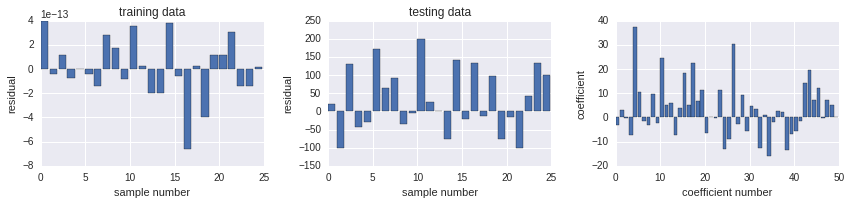

In [18]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_);

In [19]:
model = linear_model.Ridge(alpha=5)

In [20]:
model.fit(X_train, y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
resid_train = y_train - model.predict(X_train)
sse_train = sum(resid_train**2)
sse_train

3292.9620358692619

In [22]:
resid_test = y_test - model.predict(X_test)
sse_test = sum(resid_test**2)
sse_test

209557.58585055027

In [23]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9900302124332474, 0.32691539290134641)

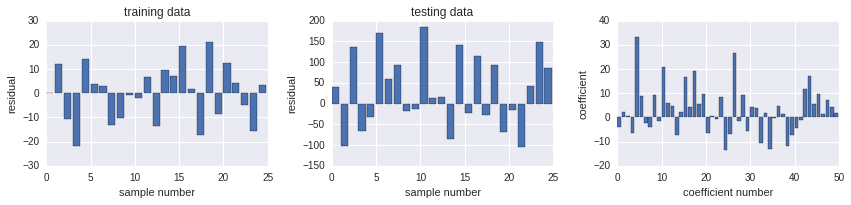

In [24]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [25]:
model = linear_model.Lasso(alpha=1.0)

In [26]:
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

309.749713895323

In [28]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

1489.1176065002585

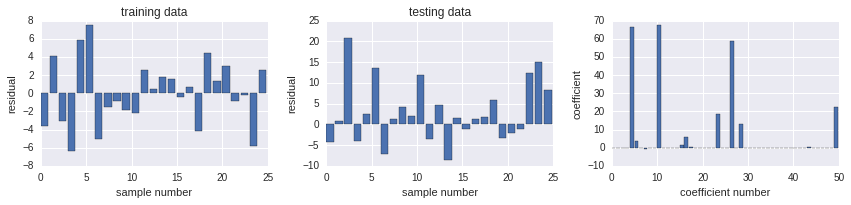

In [29]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [30]:
alphas = np.logspace(-4, 2, 100)

In [31]:
coeffs = np.zeros((len(alphas), X_train.shape[1]))
sse_train = np.zeros_like(alphas)
sse_test = np.zeros_like(alphas)

for n, alpha in enumerate(alphas):
    model = linear_model.Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    resid = y_train - model.predict(X_train)
    sse_train[n] = sum(resid**2)
    resid = y_test - model.predict(X_test)
    sse_test[n] = sum(resid**2)

/home/evil_rabbit/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


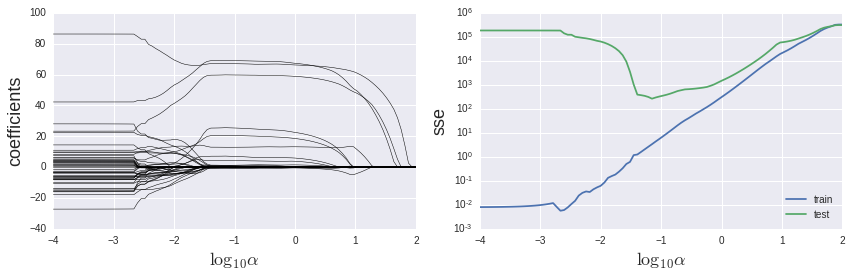

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)

axes[1].semilogy(np.log10(alphas), sse_train, label="train")
axes[1].semilogy(np.log10(alphas), sse_test, label="test")
axes[1].legend(loc=0)

axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[0].set_ylabel(r"coefficients", fontsize=18)
axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[1].set_ylabel(r"sse", fontsize=18)
fig.tight_layout()

In [48]:
model = linear_model.LassoCV()

In [49]:
model.fit(X_all, y_all)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [50]:
model.alpha_

0.06559238747534718

In [51]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

1.5450589323146529

In [52]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

1.5321417406216356

In [53]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.99999532217220677, 0.99999507886570982)

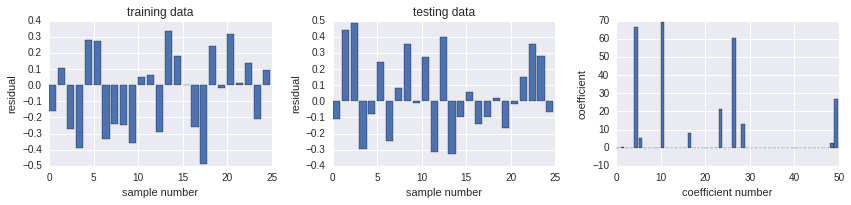

In [54]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

# 3. Classification

In [55]:
iris = datasets.load_iris()

In [56]:
type(iris)

sklearn.datasets.base.Bunch

In [57]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [58]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [59]:
iris.data.shape

(150, 4)

In [60]:
iris.target.shape

(150,)

In [61]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(iris.data, iris.target, train_size=0.7)

In [62]:
classifier = linear_model.LogisticRegression()

In [63]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
y_test_pred = classifier.predict(X_test)

In [65]:
print(metrics.classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        18
          1       1.00      1.00      1.00        14
          2       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        45



In [66]:
np.bincount(y_test)

array([18, 14, 13])

In [67]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[18,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 13]])

In [68]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[18,  0,  0],
       [ 0, 14,  0],
       [ 0,  3, 10]])

In [69]:
classifier = neighbors.KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[18,  0,  0],
       [ 0, 13,  1],
       [ 0,  2, 11]])

In [70]:
classifier = svm.SVC()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[18,  0,  0],
       [ 0, 13,  1],
       [ 0,  1, 12]])

In [71]:
classifier = ensemble.RandomForestClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[18,  0,  0],
       [ 0, 14,  0],
       [ 0,  2, 11]])

In [72]:
train_size_vec = np.linspace(0.1, 0.9, 30)

In [73]:
classifiers = [tree.DecisionTreeClassifier,
               neighbors.KNeighborsClassifier,
               svm.SVC,
               ensemble.RandomForestClassifier
              ]

In [74]:
cm_diags = np.zeros((3, len(train_size_vec), len(classifiers)), dtype=float)

In [75]:
for n, train_size in enumerate(train_size_vec):
    X_train, X_test, y_train, y_test = \
        cross_validation.train_test_split(iris.data, iris.target, train_size=train_size)

    for m, Classifier in enumerate(classifiers): 
        classifier = Classifier()
        classifier.fit(X_train, y_train)
        y_test_pred = classifier.predict(X_test)
        cm_diags[:, n, m] = metrics.confusion_matrix(y_test, y_test_pred).diagonal()
        cm_diags[:, n, m] /= np.bincount(y_test)

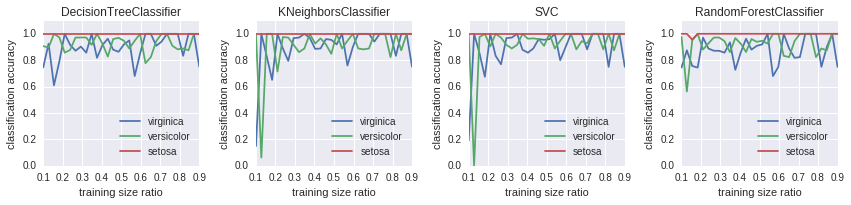

In [76]:
fig, axes = plt.subplots(1, len(classifiers), figsize=(12, 3))

for m, Classifier in enumerate(classifiers): 
    axes[m].plot(train_size_vec, cm_diags[2, :, m], label=iris.target_names[2])
    axes[m].plot(train_size_vec, cm_diags[1, :, m], label=iris.target_names[1])
    axes[m].plot(train_size_vec, cm_diags[0, :, m], label=iris.target_names[0])
    axes[m].set_title(type(Classifier()).__name__)
    axes[m].set_ylim(0, 1.1)
    axes[m].set_xlim(0.1, 0.9)
    axes[m].set_ylabel("classification accuracy")
    axes[m].set_xlabel("training size ratio")
    axes[m].legend(loc=4)

fig.tight_layout()

# 4. Clustering

In [77]:
X, y = iris.data, iris.target

In [78]:
np.random.seed(123)

In [79]:
n_clusters = 3

In [80]:
c = cluster.KMeans(n_clusters=n_clusters)

In [81]:
c.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [82]:
y_pred = c.predict(X)

In [90]:
y_pred[::8]

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0], dtype=int32)

In [91]:
y[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [92]:
idx_0, idx_1, idx_2 = (np.where(y_pred == n) for n in range(3))

In [93]:
y_pred[idx_0], y_pred[idx_1], y_pred[idx_2] = 2, 0, 1

In [94]:
y_pred[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2], dtype=int32)

In [95]:
metrics.confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])